In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('C:/Users/rgangurde/Downloads/FuelConsumptionCo2.csv')

In [3]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
dt = df[['ENGINESIZE','CYLINDERS','CO2EMISSIONS']]

In [5]:
dt.head()

,ENGINESIZE,CYLINDERS,CO2EMISSIONS
0,2.0,4,196
1,2.4,4,221
2,1.5,4,136
3,3.5,6,255
4,3.5,6,244


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000096AAC50>,
      dtype=object)

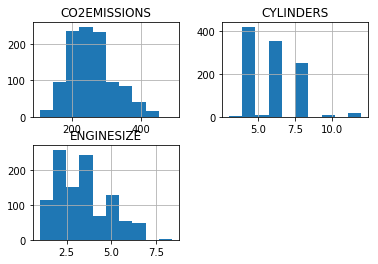

In [7]:
dt.hist()

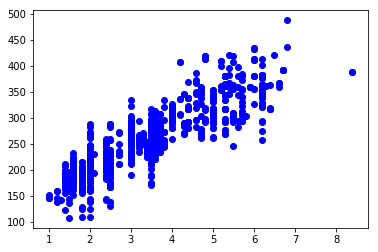

In [8]:
plt.scatter(dt.ENGINESIZE,dt.CO2EMISSIONS, color = 'blue')

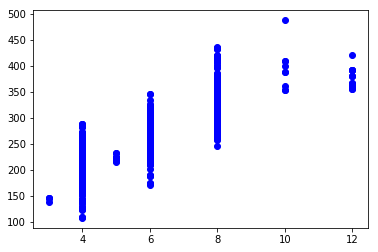

In [9]:
plt.scatter(dt.CYLINDERS,dt.CO2EMISSIONS, color = 'blue')

The two plots show that the EngineSize - Co2Emission has a linear relation. Hence EngineSize can be a good estimator for our model

Creating train and test dataset. 70% of our dataset will be train and 30% would be test. 

In [10]:
import numpy as np
msk = np.random.rand(len(dt)) < 0.7

In [11]:
train = dt[msk]
test = dt[~msk]

In [12]:
train.head()

,ENGINESIZE,CYLINDERS,CO2EMISSIONS
1,2.4,4,221
2,1.5,4,136
3,3.5,6,255
5,3.5,6,230
7,3.7,6,255


In [13]:
test.head()

,ENGINESIZE,CYLINDERS,CO2EMISSIONS
0,2.0,4,196
4,3.5,6,244
6,3.5,6,232
8,3.7,6,267
12,5.9,12,359


Now that we have our train and test data, we model our data using scikit-learn

In [14]:
import sklearn
from sklearn import linear_model

In [15]:
regr = linear_model.LinearRegression()

In [16]:
trainX = np.asanyarray(train[['ENGINESIZE']])
trainY = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(trainX, trainY)
theta1 = regr.coef_[0][0]
theta0 = regr.intercept_[0]

In [17]:
print(theta1, theta0)

38.8042958437259 125.75888155638387


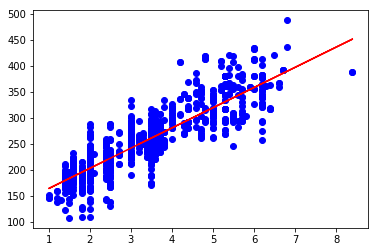

In [18]:
plt.scatter(dt.ENGINESIZE, dt.CO2EMISSIONS, color = 'blue')
plt.plot(trainX, theta1*trainX + theta0, 'red')

Now we evaluate our model with metric such as mean absolute error, mean squared error and the r2 score

In [19]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

In [20]:
MAS = np.mean(np.absolute(test_y - test_y_))
MSE = np.mean((test_y - test_y_)*2)
R2S = r2_score(test_y, test_y_)

In [21]:
print('Mean Absolute Error : ', MAS)
print('Mean Squared Error : ', MSE)
print('R2 Score : ', R2S)

Mean Absolute Error :  22.510191275134176
Mean Squared Error :  3.8403201704365064
R2 Score :  0.7718286517103251
